In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sympy as sym
from IPython.display import display, Math
import warnings

# <font color="red">**Row and column vectors**</font>

In [2]:
row_vec = np.array([4, 2])
col_vec = np.array([[-2], [3]])

print(f"row_vec: {row_vec}")
print(f"col_vec:\n {col_vec}")

row_vec: [4 2]
col_vec:
 [[-2]
 [ 3]]


In [3]:
display(Math(sym.latex(sym.sympify(row_vec))))
display(Math(sym.latex(sym.sympify(col_vec))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

c:\Users\56976\anaconda3\envs\TimeSeriesDarts\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


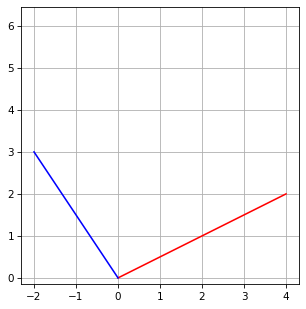

In [4]:
plt.plot([0, row_vec[0]], [0, row_vec[1]], "r", label="row vector")
plt.plot([0, col_vec[0]], [0, col_vec[1]], "b", label="col vector")

plt.axis("square")
plt.grid(visible=True)

In [5]:
import plotly.express as px

# all this line start from the origin. thats why they go together with 0

# Create a dataframe for the first line
df = pd.DataFrame({"x": [0, 3], "y": [0, 0], "z": [0, -4]})
# Plot the first line plot
fig = px.line_3d(df, x="x", y="y", z="z")

# Create a dataframe for the second line
df1 = pd.DataFrame({"x": [0, -1], "y": [0, 1], "z": [0, 3]})
# Plot the second line
fig.add_scatter3d(x=df1["x"], y=df1["y"], z=df1["z"], mode="lines")

fig.show()

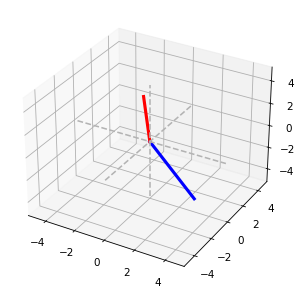

In [6]:
v3_1 = np.array([3, 0, -4])
v3_2 = np.array([-1, 1, 3])

fig = plt.figure(figsize=plt.figaspect(1))
ax = fig.add_subplot(111, projection="3d")

# draw vectors
ax.plot([0, v3_1[0]], [0, v3_1[1]], [0, v3_1[2]], "b", linewidth=3)
ax.plot([0, v3_2[0]], [0, v3_2[1]], [0, v3_2[2]], "r", linewidth=3)

# guidelines
ax.plot([-5, 5], [0, 0], [0, 0], "--", color=[0.7, 0.7, 0.7])
ax.plot([0, 0], [-5, 5], [0, 0], "--", color=[0.7, 0.7, 0.7])
ax.plot([0, 0], [0, 0], [-5, 5], "--", color=[0.7, 0.7, 0.7])

ax.set_xlim3d(-5, 5)
ax.set_ylim3d(-5, 5)
ax.set_zlim3d(-5, 5)
plt.show()

**Adding and scalar-multiplying vectors**


vector +(or *) vector (must have same shape):
$
\begin{bmatrix} 
1\\
0\\
4\\
3\\
\end{bmatrix} +
\begin{bmatrix} 
2\\
-3\\
-2\\
1\\
\end{bmatrix} =
\begin{bmatrix} 
3\\
-3\\
2\\
4\\
\end{bmatrix}
$

scalar x vector: 
$ 7 * 
\begin{bmatrix} 
-1\\
0\\
1\\
\end{bmatrix} = 
\begin{bmatrix} 
-7\\
0\\
7\\
\end{bmatrix} $


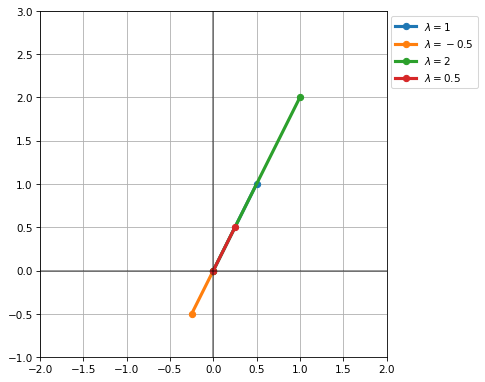

In [7]:
# Scalar * vector

v = np.array([0.5, 1])  # vector
s = [1, -0.5, 2, 0.5]  # scalars

plt.figure(figsize=(6, 6),dpi=75)
for si in s:
    sv = si * v
    plt.plot([0, sv[0]], [0, sv[1]], "o-", linewidth=3, label="$\\lambda=%g$" % (si))

plt.axis("square")
plt.legend(bbox_to_anchor=([1.28, 1, 0, 0]))
plt.axhline(0, color="black", alpha=0.5)
plt.axvline(0, color="black", alpha=0.5)
plt.axis([-2, 2, -1, 3])
plt.grid()
plt.show()

[0 3] [0 3]


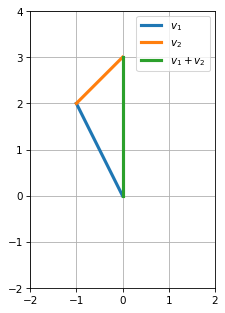

In [8]:
# adding vectors (Vector + Vector)
v1 = np.array([-1, 2])
v2 = np.array([1, 1])
v3 = v1 + v2

v3a = v1 + v2
v3b = np.add(v1, v2)


print(v3a, v3b)

plt.plot([0, v1[0]], [0, v1[1]], label="$v_1$", linewidth=3)
plt.plot([0, v2[0]] + v1[0], [0, v2[1]] + v1[1], label="$v_2$", linewidth=3)
plt.plot([0, v3[0]], [0, v3[1]], label="$v_1+v_2$", linewidth=3)
# plt.plot([0,v2[0]],[0,v2[1]],linewidth=3)

plt.axis("square")
plt.legend()
plt.axis([-2, 2, -2, 4])
plt.grid()
plt.show()

# <font color="red"> **Dot Product**</font>

$$\alpha =  a \cdot b =\ <a,b>\  =\  a^Tb = \sum_{i=1}^n a_i b_i $$

The dot product is an operation that takes in two vectors and returns a number.
That description probably doesn't help much.
**The dot product tells us how similar the directions of our two vectors are.**
Remember that a vector is a length and direction;
a vector tells us how far to move in it's direction.

Dot product is a scalar (single value) that is produced from the multiplication of two vectors. It measures the cosine of the angle between the two vectors, and is used to determine the degree of similarity or orthogonality between the vectors.

Matrix multiplication, on the other hand, involves the multiplication of two matrices to produce a third matrix. It involves multiplying elements from each row in the first matrix with elements from each column in the second matrix and summing the products to obtain an element in the result matrix.

The dot product can be thought of as a special case of matrix multiplication where the two matrices being multiplied are 1-dimensional (vectors) and the result is a scalar. In this case, the dot product is obtained by multiplying corresponding elements of the two vectors and summing the products.

In machine learning, <font color="red">Matrix multiplication</font> is one of the most common operations
python has operator "@" and tensorflow has built in tf.matmul and numpy has np.dot

there are 2 rules our tensors (or matrices) we need to fulfill if we're going to multiply them.
- 1) The inner dimensions (red) must match
- 2) The resulting matrix has the shape of the outer dimensions (blue)

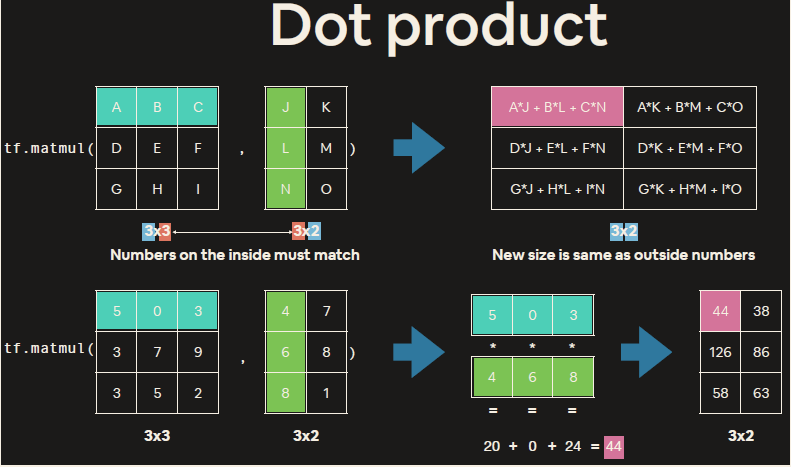

<font color="blue">Transpose is different than reshape</font>: Transpose switches up the axises, reshape just shuffles the elements to match desired shape.

Generally, when performing matrix multiplication on 2 tensors and one of the axes doesn't lineup, you will Transpose (rather than reshape) one of the tensors to satisfy the matrix multiplication rules.

In [9]:
v = np.arange(10, 20, 3)
w = np.arange(5, 15, 3)

print(v.shape, w.shape)

dp1 = 0

for i in range(0, len(v)):

    dp1 = dp1 + v[i] * w[i]

dp2 = np.sum(np.multiply(v, w))
dp3 = np.dot(v, w)
dp4 = np.matmul(v, w)

dp1, dp2, dp3, dp4

(4,) (4,)


(596, 596, 596, 596)

In [10]:
# write a function that takes two vectors, tests whether the dot product is valid between them, and returns the dot product or gives an error message


def mydotproduct(v, w):

    # squeeze out singleton dimensions
    # v = np.squeeze(v)
    # w = np.squeeze(w)

    # check whether they are the same size
    if v.shape[-1] != w.shape[0]:
        raise ValueError("Vectors must have the same length!")

    display(
        Math("v^Tw = %s" % (sym.latex(sym.sympify(np.dot(v, w).astype("float16")))))
    )

In [11]:
# v1 = np.random.randn(1,10)
# v2 = np.random.randn(10,1)
v1 = np.random.rand(3, 4, 2)
v2 = np.random.rand(2, 3)
# np.shape(np.squeeze(v2))
print(v1.shape, v2.shape)

mydotproduct(v1, v2)

(3, 4, 2) (2, 3)


<IPython.core.display.Math object>

The error you're encountering is due to the fact that the shapes of v1 and v2 are not compatible for matrix multiplication. Matrix multiplication requires that the number of columns in the first matrix be equal to the number of rows in the second matrix. In this case, v1 has shape (6,2,2) and v2 has shape (2,2,6). So, the number of columns in v1 (i.e., the size of the second dimension) is not equal to the number of rows in v2 (i.e., the size of the first dimension)

In [12]:
print(np.matmul(v1, v2).shape)
np.matmul(v1, v2)

(3, 4, 3)


array([[[0.92734117, 0.60878186, 0.79915028],
        [0.71307676, 0.49475001, 0.57103361],
        [0.47792643, 0.2339712 , 0.5420979 ],
        [0.60604147, 0.35616768, 0.59031911]],

       [[0.62749913, 0.37775213, 0.59657031],
        [0.79095533, 0.56609633, 0.60513684],
        [0.8420496 , 0.54902756, 0.73179042],
        [1.04540401, 0.63164073, 0.99010369]],

       [[0.28020534, 0.21180952, 0.19598992],
        [0.48196252, 0.36473722, 0.33642717],
        [0.68475694, 0.47770458, 0.54410479],
        [0.35362982, 0.20490726, 0.34922143]]])

In [13]:
print(np.finfo(np.float16).precision)
print(np.finfo(np.float32).precision)
print(np.finfo(np.float64).precision)

3
6
15


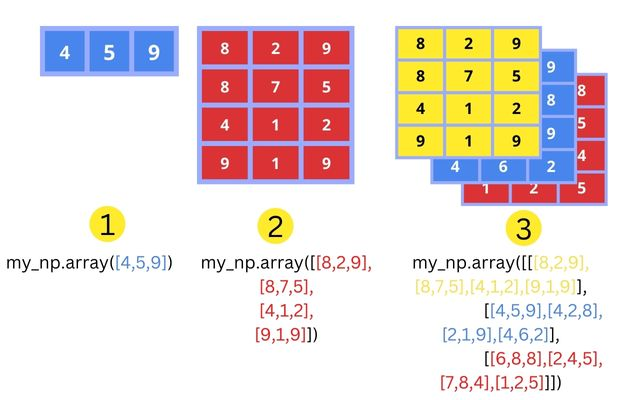

**Application of dot product: Correlation coefficient**

$$ r_{xy} = \large {\frac{\sum_{i=1}^n (x_i - \bar x)(y_i - \bar y)}{\sqrt{\sum_{i=1}^n (x_i - \bar x)^2} \sqrt{\sum_{i=1}^n (y_i - \bar y)^2}}}$$

In [14]:
courses = np.array([4, 5, 8, 2, 9, 9, 1, 3, 7])
happy = np.array([6, 7, 9, 3, 9, 3, 1, 6, 7])

m = courses - courses.mean()
h = happy - happy.mean()


# compute correlation
numer = np.dot(m, h)
denom = np.sqrt(np.dot(m, m)) * np.sqrt(np.dot(h, h))
r1 = numer / denom
r2 = np.corrcoef(m, h)

print(r1)
print(r2)

0.60530206024143
[[1.         0.60530206]
 [0.60530206 1.        ]]


In [15]:
np.dot(courses - courses.mean(), happy - happy.mean()) / (
    np.sqrt(np.sum((courses - courses.mean()) ** 2))
    * np.sqrt(np.sum((happy - happy.mean()) ** 2))
)

0.60530206024143

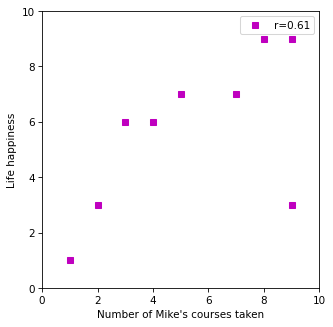

In [16]:
plt.plot(courses, happy, "ms", label="r=%s" % np.round(r1, 2))

plt.axis([0, 10, 0, 10])
plt.gca().set_aspect("equal")
plt.xlabel("Number of Mike's courses taken")
plt.ylabel("Life happiness")
plt.legend()
plt.show()

# <font color="red">**Outer Product**</font>


$
\begin{bmatrix} 
1\\
0\\
2\\
5\\
\end{bmatrix} 
\begin{bmatrix} 
a & b & c & d
\end{bmatrix} = \begin{bmatrix}
1a & 1b & 1c & 1d\\
0a & 0b & 0c & 0d\\
2a & 2b & 2c & 2d\\ 
5a & 5b & 5c & 5d
\end{bmatrix}
$

(50, 80)


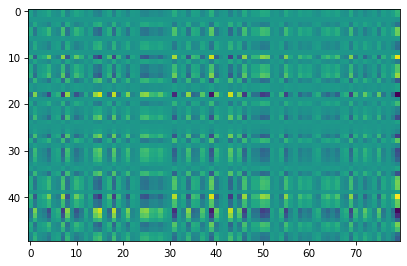

In [17]:
v1 = np.random.randn(50)
v2 = np.random.randn(80)

op = np.outer(v1, v2)
print(op.shape)

plt.imshow(op);

Demonstrate if the following properties apply to outer product.

$\text{Matrix commutative:  } np.outer(v,w) == np.outer(w,v) $

$\text{Scalar-multiplication-commutative, being c a scalar:   }\   cv \otimes w = cw \otimes v $

In [18]:
v1 = np.random.randn(50)
v2 = np.random.randn(80)
c = 2

# matrix commutative is false
print(np.outer(v1, v2).shape == np.outer(v2, v1).shape)

# Scalar-multiplication-commutative is true.
sum(sum(np.outer(c * v1, v2) - np.outer(v1, c * v2)))

False


0.0

# <font color="red">**Matrix multiplication**</font>
- the "inner/outer" rule of matrix multiplication validity
- the mechanics of matrix multiplication

Dot product is a scalar (single value) that is produced from the multiplication of two vectors. It measures the cosine of the angle between the two vectors, and is used to determine the degree of similarity or orthogonality between the vectors.

Matrix multiplication, on the other hand, involves the multiplication of two matrices to produce a third matrix. It involves multiplying elements from each row in the first matrix with elements from each column in the second matrix and summing the products to obtain an element in the result matrix.

The dot product can be thought of as a special case of matrix multiplication where the two matrices being multiplied are 1-dimensional (vectors) and the result is a scalar. In this case, the dot product is obtained by multiplying corresponding elements of the two vectors and summing the products.

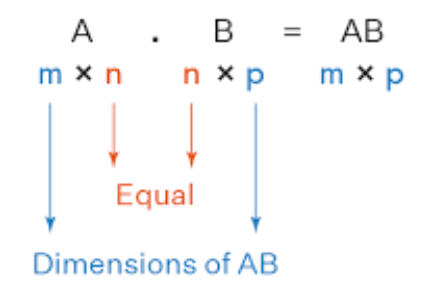

A 3D matrix is nothing but a collection (or a stack) of many 2D matrices, just like how a 2D matrix is a collection/stack of many 1D vectors. So, matrix multiplication of 3D matrices involves multiple multiplications of 2D matrices, which eventually boils down to a dot product between their row/column vectors.

In [19]:
a = np.random.randint(0, 10, (6, 2, 3))

In [20]:
b = np.random.randint(0, 10, (6, 3, 5))

In [21]:
np.dot(a, b).shape  # this not recommended for matrices, only vectors.

(6, 2, 6, 5)

This works in matmul because the first dimension (stacks) is the same on **both matrices** (6), and the numbers of columns of **"a"** (3) a.k.a third (or last) dimension of **a** is the same as **"b"** rows or second dimension of **b**.

In [22]:
print(np.matmul(a, b).shape)  # this is preffered by numpy
np.matmul(a, b)

(6, 2, 5)


array([[[ 75,  92,  59,  50,  87],
        [ 68,  40,  92,  64,  68]],

       [[ 42,  63, 127,  66,  52],
        [ 40,  60, 104,  68,  40]],

       [[ 54,  74, 114,  48, 132],
        [ 47,  75,  69,  52,  90]],

       [[118, 100,  91,  32,  76],
        [ 84,  18,  53,  22,  21]],

       [[124,  96,  77, 124,  45],
        [106,  96,  72, 112,  44]],

       [[ 85,  75,  91,  65,  51],
        [ 76,  28,  63,  65,  12]]])

The shape of b is (2, 3), which means it has two dimensions, with 2 rows and 3 columns.

In [23]:
b = np.array([[1, 2, 3], [4, 5, 6]])
print(b.shape)
b

(2, 3)


array([[1, 2, 3],
       [4, 5, 6]])

**Exercise** (hand-write matrix multiplication)

In [24]:
def matrixMultiplication(A, B):

    # get matrix sizes
    szA = np.shape(A)
    szB = np.shape(B)

    # give error if sizes don't match
    if szA[1] != szB[0]:
        raise ValueError('"Inner" dimensions don' "t match!")

    # initialize
    C = np.zeros((szA[0], szB[1]))

    # compute!
    for i in range(szA[0]):
        for j in range(szB[1]):
            # C[i,j] = np.dot(A[i,:],B[:,j])
            C[i, j] = np.sum(np.multiply(A[i, :], B[:, j]))

    return C

In [25]:
A = np.random.randn(4, 6)
B = np.random.randn(6, 2)

C1 = matrixMultiplication(A, B)

In [26]:
C1

array([[-0.10196881,  1.82937033],
       [ 3.39611296, -2.47248959],
       [ 1.56270052, -5.00049701],
       [ 2.4646583 , -3.18641737]])

In [27]:
np.dot(A, B)

array([[-0.10196881,  1.82937033],
       [ 3.39611296, -2.47248959],
       [ 1.56270052, -5.00049701],
       [ 2.4646583 , -3.18641737]])

In [28]:
np.dot(A[0, :], B[:, 0])

-0.1019688067609627

In [29]:
np.sum(np.multiply(A[0, :], B[:, 0]))

-0.1019688067609627

In [30]:
import pandas as pd

print(C1.shape)
pd.DataFrame(C1)

(4, 2)


,0,1
0,-0.101969,1.829370
1,3.396113,-2.472490
2,1.562701,-5.000497
3,2.464658,-3.186417


In [31]:
A[0, :]

array([-1.01367875, -0.7766652 ,  0.27993454,  0.21547084,  0.44395587,
       -0.16259899])

In [32]:
B[:, 0]

array([-0.6075122 ,  0.67228082, -0.26896505,  1.17627969, -1.58585012,
       -2.03096093])

In [33]:
A[0, :] * B[:, 0]

array([ 0.61582221, -0.52213712, -0.07529261,  0.25345397, -0.70404746,
        0.3302322 ])

# <font color="red"> Transposing vectors and matrices</font>

$
\begin{bmatrix} 
1\\
0\\
2\\
5\\
\end{bmatrix}^T = 
\begin{bmatrix} 
1 & 0 & 2 & 5
\end{bmatrix}$


$$ v^{TT} = v$$

Matrix transposition is a common operation in linear algebra and has several useful properties. The main reason you might want to transpose a matrix is to change the orientation or shape of the matrix, which can be useful in various mathematical and computational contexts. Here are a few specific reasons why you might want to transpose a matrix:

Convenience in calculation: Transposing a matrix can often simplify the calculation process, especially when working with linear transformations or dot products.

Switching between row and column vectors: Transposing a matrix switches the row vectors of the original matrix to the column vectors of the transposed matrix and vice versa. This can be useful in various applications, such as changing the representation of a vector from a row vector to a column vector, which can simplify calculation in some contexts.

Change of coordinate systems: In geometry, matrices are often used to represent linear transformations, such as rotations and scalings. Transposing a matrix can change the way a transformation is represented, which can simplify calculation and understanding in some cases.

Overall, the transpose of a matrix can play a useful role in many mathematical and computational applications, and understanding when and how to transpose a matrix can be an important tool in your toolkit.

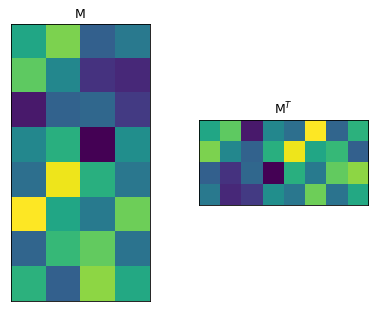

In [34]:
# matrix and image
mat = np.random.randn(8, 4)
matT = mat.T

fig, ax = plt.subplots(1, 2)
ax[0].imshow(mat)
ax[0].set_title("M")

ax[1].imshow(matT)
ax[1].set_title("M$^T$")

# set common properties
for i in ax:
    i.set_yticks([])
    i.set_xticks([])

plt.show()

A matrix multiplied by its transpose is said to be square-symmetric if the result is a symmetric matrix, meaning that it is equal to its transpose.

Formally, let A be a matrix, then A multiplied by its transpose A' (denoted as A * A') is square-symmetric if and only if:

A * A' = (A * A')'

In other words, if a matrix A is multiplied by its transpose, the result is a symmetric matrix whose elements are equal to their transposes.

In [35]:
# show that a matrix times its transpose is square-symmetric

# sizes
m = 10
n = 14

amat = np.random.randn(m, n)

# palindromic variables! (literal and referent!)
amatama = amat @ amat.T

# show it's square
print(np.shape(amatama))

# show it's symmetric
amatama - amatama.T

(10, 10)


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

# <font color="red">Special matrices</font>

**Identity Matrix**

An identity matrix is a square matrix with ones along the main diagonal and zeros everywhere else. The identity matrix has the special property that when it is multiplied by any other matrix, the result is the same matrix.

The identity matrix is a useful tool in linear algebra, as it can be used to represent the concept of "do nothing" in linear transformations. For example, if you want to apply no transformation to a vector, you can simply multiply it by the identity matrix. Additionally, the identity matrix is an important component in solving systems of linear equations, as well as in inverting matrices.

**Triangular Matrix**

A triangular matrix is a type of square matrix that has all its entries either above or below the main diagonal set to zero. Triangular matrices can be further classified into two categories: upper triangular matrices and lower triangular matrices.

An upper triangular matrix is a square matrix with all the entries below the main diagonal set to zero

A lower triangular matrix is a square matrix with all the entries above the main diagonal set to zero

Triangular matrices have several important properties and applications in linear algebra, including matrix factorization, solving systems of linear equations, and computation of determinants and inverses. Triangular matrices can also be efficiently manipulated, as the zeros in the upper or lower triangular structure allow for efficient storage and computation, making them a useful tool in many mathematical and computational contexts.

In [36]:
# identity
I = np.eye(4)
print(I)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [37]:
# zeros
Z = np.zeros((5, 5))
print(Z)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [38]:
# diagonal
D = np.diag([1, 3, 2, 4, 5])
print(D)
d = np.diagonal(D)
print(d)

[[1 0 0 0 0]
 [0 3 0 0 0]
 [0 0 2 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]
[1 3 2 4 5]


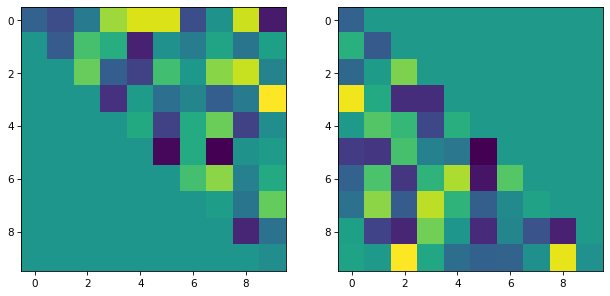

In [39]:
# Triangular matrices.
T = np.random.randn(10, 10)

plt.figure(figsize=(10, 6), dpi=75)
plt.subplot(1, 2, 1)
plt.imshow(np.triu(T))
plt.subplot(1, 2, 2)
plt.imshow(np.tril(T))

In [40]:
random_mat = np.random.randint(-4, 4, (4, 4))

print(random_mat)

random_mat @ np.eye(4)  # any matrices @ identity is the same original matrix

[[ 3  0 -2  2]
 [-4 -1 -4 -4]
 [ 2  0 -4 -3]
 [-1 -1  0  2]]


array([[ 3.,  0., -2.,  2.],
       [-4., -1., -4., -4.],
       [ 2.,  0., -4., -3.],
       [-1., -1.,  0.,  2.]])

In [41]:
random_mat @ np.triu(np.random.randint(-4, 4, (4, 4)))

array([[ -9,   9,  -8,  -8],
       [ 12, -13,  24,  -1],
       [ -6,   6,   0, -15],
       [  3,  -4,   4,   7]])

[[1 2 3 4 5]
 [2 1 2 3 4]
 [3 2 1 2 3]
 [4 3 2 1 2]
 [5 4 3 2 1]]


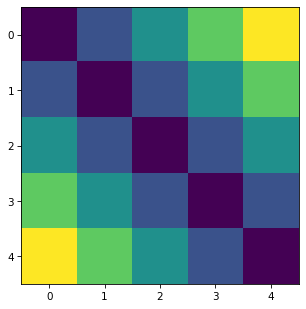

In [42]:
# figure out what a Toeplitz matrix is
from scipy.linalg import toeplitz

v = np.arange(1, 6)
toe = toeplitz(v)

print(toe)

plt.imshow(toe)
plt.show()

# <font color="red">Matrix Inverse</font>

$ A = \begin{pmatrix}
a & b & c \\
d & e & f \\
g & h & i \\
\end{pmatrix} $

$ \text{Cof(A)} = \begin{pmatrix}
ei-fh & -(di-fg) & dh-eg \\
-(bi-ch) & ah-cg & -bh+ae \\
bc-af & -ac+df & \det(A) \\
\end{pmatrix}$

$ A^{-1} = \frac{1}{det(A)} * adj(A) $

$ adj(A) = \text{Transpose of cofactor Matrix:  } Cof(A)^T $

$ A^{-1} = \frac{1}{\det(A)} \begin{pmatrix}
ei-fh & -(bi-ch) & bc-af \\
-(di-fg) & ah-cg & -ac+df \\
dh-eg & -bh+ae & \det(A)
\end{pmatrix}$

$ \text{where} \det(A) \text{ is the determinant of the matrix } A. $

$ det(A) = a * (e * i - f * h) - b * (d * i - f * g) + c * (d * h - e * g) $


---------------------------------------------------------------------------------------------------------------------


$$ \text{being A a matrix, x the value i want to isolate, and b a scalar, i need to solve the following} $$
$$ Ax = b $$
$$\text{i cant divide b with A, since "division" formally doesnt exist like that when working with matrices}$$
$$\text{what i need to is find the inverse so i can do the following} $$
$$ A^{-1} Ax = A^{-1}b $$
$$ \text{So i would end up with: } x = A^{-1}*b $$

however all not matrices have an inverse, a matrix is inversible if:
- it is square nrow = n columns
- full rank: every column posses unique information in the matrix (column cant be a combination of other columns)

$$ \text{The following property is true if the matrix is invertible} $$
$$ A^{-1} \cdot A = I $$


**If the matrix is not invertible we can use the <font color="red">PSEUDOINVERSE</font>**

a matrix has a perfect pseudo-inverse if and only if its columns are linearly independent.

In [43]:
m = 5

A = np.random.randint(-5, 5, (m, m))
Ainv = np.linalg.inv(A)

print(A)
print(Ainv)

[[ 0  1  3  3  4]
 [ 2  2 -4 -2 -5]
 [-2 -5  2  1  3]
 [ 1  3  3 -5 -4]
 [ 4 -1  2 -5 -2]]
[[ 0.32173913  0.32173913  0.11304348 -0.07826087  0.16521739]
 [-0.15072464 -0.3173913  -0.36376812 -0.0173913  -0.01884058]
 [ 0.44347826  0.44347826  0.42608696  0.24347826 -0.06956522]
 [ 0.68985507  0.85652174  0.60724638  0.15652174 -0.16376812]
 [-0.56231884 -0.89565217 -0.68405797 -0.29565217  0.17971014]]


Text(0.5, 1.0, '$A @ A^{-1}$')

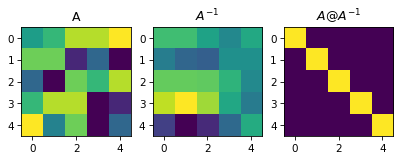

In [44]:
fig, ax = plt.subplots(1, 3)

ax[0].imshow(A)
ax[0].set_title("A")


ax[1].imshow(Ainv)
ax[1].set_title("$A^{-1}$")


ax[2].imshow(A @ Ainv)
ax[2].set_title("$A @ A^{-1}$")

In [45]:
A @ Ainv

array([[ 1.00000000e+00, -8.88178420e-16, -8.88178420e-16,
         0.00000000e+00,  1.11022302e-16],
       [ 0.00000000e+00,  1.00000000e+00,  4.44089210e-16,
        -5.55111512e-17,  0.00000000e+00],
       [ 0.00000000e+00,  3.33066907e-16,  1.00000000e+00,
         5.55111512e-17,  0.00000000e+00],
       [ 0.00000000e+00, -4.44089210e-16,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00]])

**Exercise**

[[ 1  1 -5  1  2]
 [ 3  3 -3  1 -2]
 [-1 -1  3 -1  1]
 [ 1  1 -1  0  5]
 [ 2  2  1  2 -4]]


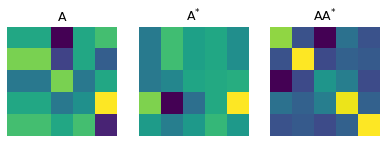

In [46]:
# pinv with repeated column in square matrix, and with non-square matrix

# first example, columns are not linealy independant so there is no perfect pseudo inverse.
# second example, we got a perfect pseudoinverse

m = 5
A = np.random.randint(-5, 6, (m, m))
A[:, 0] = A[:, 1]
print(A)

# A = np.random.randn(m,m+2)

# compute pseudo-inverse
Ainv = np.linalg.pinv(A)

fig, ax = plt.subplots(1, 3)

ax[0].imshow(A)
ax[0].set_title("A")

ax[1].imshow(Ainv)
ax[1].set_title("A$^{*}$")

ax[2].imshow(A @ Ainv)
ax[2].set_title("AA$^{*}$")

for i in ax:
    i.axis("off")

plt.show()

# <font color="red">System of equations</font>

$$ 2x + y - z = 1 $$
$$ 3x + 4y + 2z = 13 $$
$$ x - 5y - 2z = 0 $$


 $$ \begin{pmatrix}
2 & 1 & -1 \\
3 & 4 & 2 \\
1 & -5 & -2 \\
\end{pmatrix} \begin{pmatrix}
x\\
y\\
z\\
\end{pmatrix} = \begin{pmatrix}
1\\
13\\
0\\
\end{pmatrix} $$

$$ X\beta = y$$
$$ \text{"Least squares Solution"} $$
$$\beta = (X^TX)^{-1}X^Ty $$

In [47]:
X = np.array([[2, 1, -1], [3, 4, 2], [1, -5, -2]])
y = np.array([1, 13, 0])

In [48]:
beta1 = np.linalg.inv(X.T @ X) @ (X.T @ y)
beta1

array([ 3., -1.,  4.])

In [49]:
beta2 = np.linalg.solve(X, y)
beta2

array([ 3., -1.,  4.])

**Exercise**

In [50]:
# visualize the three possible outcomes of simultaneous equations

# 1) one solution
X1 = np.array([[3, -1], [-1, 1]])
y1 = np.array([6, 2])

# 2) infinite solutions
X2 = np.array([[3, -1], [1.5, -0.5]])
y2 = np.array([6, 3])

# 3) no solutions
X3 = np.array([[3, -1], [1.5, -0.5]])
y3 = np.array([6, 2])

[4. 6.]


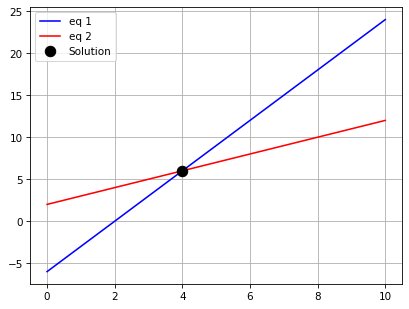

In [51]:
### generate the plot
xlim = np.array([0, 10])

# 1) Case 1: one unique solution

# convert equations into y=mx+b form
yy1 = -X1[0, 0] / X1[0, 1] * xlim + y1[0] / X1[0, 1]  # y = 3*xlim - 6
yy2 = -X1[1, 0] / X1[1, 1] * xlim + y1[1] / X1[1, 1]  # y = 2 + 1 * xlim

# plot
plt.plot(xlim, yy1, "b", label="eq 1")
plt.plot(xlim, yy2, "r", label="eq 2")

# solve and plot
b1 = np.linalg.solve(X1, y1)
plt.plot(b1[0], b1[1], "ko", markersize=10, label="Solution")

print(b1)

plt.legend()
plt.grid()
plt.show()

Lines intercept everywhere: Infinite number of solutions


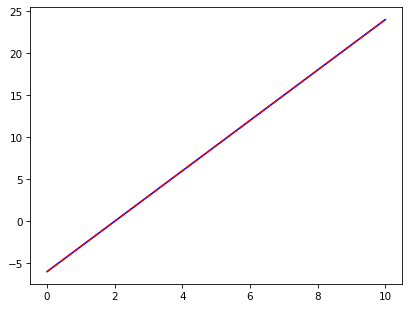

In [52]:
# Case 2: infinite solutions
# They are the same equation, infinite solution.


# convert equations into y=mx+b form
yy1 = -X2[0, 0] / X2[0, 1] * xlim + y2[0] / X2[0, 1]
yy2 = -X2[1, 0] / X2[1, 1] * xlim + y2[1] / X2[1, 1]


print("Lines intercept everywhere: Infinite number of solutions")
# plot
plt.plot(xlim, yy1, "b", label="eq 1")
plt.plot(xlim, yy2, "r--", label="eq 2");

# solve and plot
# b1 = np.linalg.solve(X2,y2)
# plt.plot(b1[0],b1[1],'ko',markersize=10,label='Solution')

# plt.legend()
# plt.grid()
# plt.show()

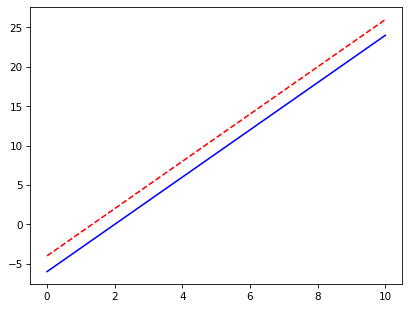

In [53]:
# Case 3: no solutions

# convert equations into y=mx+b form
yy1 = -X3[0, 0] / X3[0, 1] * xlim + y3[0] / X3[0, 1]
yy2 = -X3[1, 0] / X3[1, 1] * xlim + y3[1] / X3[1, 1]

# plot
plt.plot(xlim, yy1, "b", label="eq 1")
plt.plot(xlim, yy2, "r--", label="eq 2")

# solve and plot
# b1 = np.linalg.solve(X3,y3)
# plt.plot(b1[0],b1[1],'ko',markersize=10,label='Solution')

# plt.legend()
# plt.grid()
# plt.show()

# <font color="red">Visualizing matrix-vector multiplication</font>
- a geometric interpretation of matrix-vector multiplication
- build intuition for eigenvectors.

When you multiply a matrix with a vector, you get another vector.

The effect of multiplying a vector with a matrix, is that the matrix will rotate that vector, and shrink or stretch it.

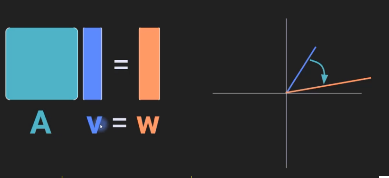

(2,)
[2.5 2. ]


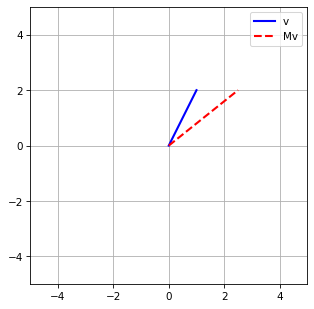

In [54]:
M = np.array([[0.5, 1], [1, 0.5]], dtype="float")

v = np.array([1, 2])
# v = np.random.randn(2)
# v = np.array([1,1])  # this makes it not rotate when multiplying
# v = np.array([1,-1])

Mv = M @ v  # matrix-vector multiplication, makes vector longer/smaller and rotates it..
print(Mv.shape)
print(Mv)

plt.plot([0, v[0]], [0, v[1]], "b", label="v", linewidth=2)
plt.plot([0, Mv[0]], [0, Mv[1]], "r--", label="Mv", linewidth=2)

plt.axis("square")
plt.axis([-5, 5, -5, 5])
plt.legend()
plt.grid()

plt.show()

**Exercise**

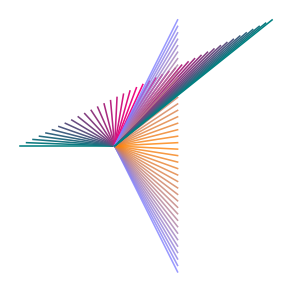

In [55]:
v1 = np.linspace(-2, 2, 40)

for i in v1:

    v = np.array([1, i])
    Mv = M @ v
    plt.plot([0, v[0]], [0, v[1]], color=[1 - abs(i) / 4, 0.5, abs(i) / 2], alpha=0.8)
    plt.plot([0, Mv[0]], [0, Mv[1]], color=[1 - abs(i) / 2, abs(i) / 4, 0.5])


plt.axis("square")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis("off")
plt.show()

# <font color="red">**Eiganvalues and Eigandecomposition**</font>

Eigandecomposition is only defined for square matrices.

Eigenvalues and eigenvectors are mathematical concepts that are widely used in linear algebra, physics, engineering, and many other fields.

An eigenvector of a square matrix A is a non-zero vector v such that when the matrix A is multiplied with v, the result is a scalar multiple of v. In other words, Av = λv, where λ is a scalar (a scalar is just a single value, not a vector) called the eigenvalue corresponding to the eigenvector v. The scalar λ is unique for each eigenvector.

Intuitively, eigenvectors of a matrix describe the directions along which the matrix has the greatest stretching effect. Eigenvalues describe the amount of stretching along those directions. They are also used in many applications, such as diagonalization of matrices, finding the characteristic polynomial of a matrix, and more.

In summary, eigenvectors and eigenvalues give information about the behavior of a linear transformation described by a matrix, and they play a key role in many areas of mathematics and science.

The eigan vector would act as the matrix, it doesnt have a rotational effect (we can see its on the same line), just a direction.
The eigan value indicates the magnitude of stretching or shrinking

The eigan vector is special only related to an specific matrix, its not special on its own.

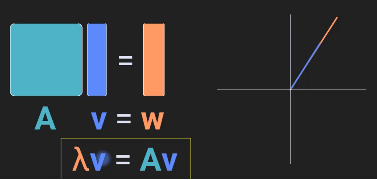

$$ {\color{green}A} = Matrix $$
$$ {\color{red}V} = Eigan vectors $$
$$ {\color{orange}E} = Eigan values $$

$$ {\color{green}A}{\color{red}V} = {\color{red}V}{\color{orange}E} $$
$$ {\color{green}A} = {\color{red}V} {\color{orange}E} {\color{red}V}^{-1} $$

Sometimes Eigan decomposition is called "diagonalization".

 when we multiply a matrix with its transpose, we obtain a real-valued symmetric matrix, which has a real-valued eigenvalue decomposition, consisting of real-valued eigenvalues and orthogonal eigenvectors. This property makes the eigenvalue decomposition of A * A^T useful in various applications, such as in finding the singular value decomposition of A, in solving eigenvalue problems, and in regression analysis, among others.

Text(0.5, 1.0, 'Eiganvectors')

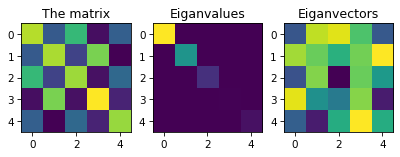

In [56]:
M = np.random.randint(-5, 6, (5, 5))  # Needs to be a square matrix
M = M @ M.T  # This ensures we get a real valued eigan decomposition instead of complex. (ensures symetry)

eigvals, eigvecs = np.linalg.eig(M)

fig, ax = plt.subplots(1, 3)

ax[0].imshow(M)
ax[0].set_title("The matrix")

ax[1].imshow(np.diag(eigvals))
ax[1].set_title("Eiganvalues")

ax[2].imshow(eigvecs)
ax[2].set_title("Eiganvectors")

In [57]:
# but what do they mean??

Mv = M @ eigvecs[:, 0]
lv = eigvals[0] * eigvecs[:, 0]

print(Mv)
print(lv)

[-57.93673356  78.58266203 -61.99509218 101.24656068 -50.20374467]
[-57.93673356  78.58266203 -61.99509218 101.24656068 -50.20374467]


**Exercise Eigan decomposition**

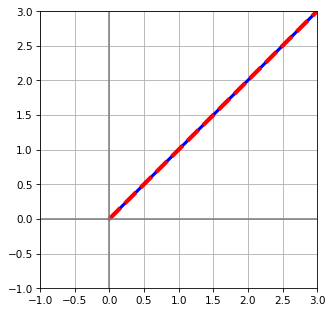

In [58]:
M = np.array([[1, 2], [1, 2]])
M = M @ M.T

eigvals, eigvecs = np.linalg.eig(M)

Mv = M @ eigvecs[:, 0]
lv = eigvals[0] * eigvecs[:, 0]

plt.plot([0, Mv[0]], [0, Mv[0]], "b", label="Mv",lw=3)
plt.plot([0, lv[0]], [0, lv[0]], "r--",label="$\lambda v$",lw=4)
plt.grid(visible=True)
plt.axis("square");
plt.xlim([-1,3])
plt.ylim([-1,3])
plt.axhline(0, color="grey")
plt.axvline(0, color="grey");

In [59]:
m = np.random.randn(6, 6)
m = m @ m.T

eigvals, eigvecs = np.linalg.eig(m)

In [60]:
eigvecs

array([[-0.33037448,  0.27647933,  0.74390191, -0.33684409,  0.34980883,
         0.15871884],
       [ 0.13144088,  0.03884011, -0.19916785, -0.36864148, -0.23147299,
         0.86722005],
       [ 0.32953427,  0.74564308, -0.25357703,  0.23975897,  0.45492037,
         0.08176397],
       [ 0.21807558,  0.04986189, -0.26713907, -0.83047786,  0.12396096,
        -0.41657383],
       [-0.25565296, -0.48123022, -0.31969901,  0.02054384,  0.74974648,
         0.19572874],
       [-0.80750713,  0.36331568, -0.4111813 , -0.05513277, -0.19903616,
        -0.06487579]])

In [61]:
dps = np.zeros((6, 6))

for i in range(0, 6):
    for j in range(0, 6):
        dps[i, j] = np.dot(eigvecs[:, i], eigvecs[:, j])

print(np.round(dps, 2))

[[ 1. -0. -0. -0.  0. -0.]
 [-0.  1. -0. -0. -0. -0.]
 [-0. -0.  1.  0. -0.  0.]
 [-0. -0.  0.  1.  0. -0.]
 [ 0. -0. -0.  0.  1.  0.]
 [-0. -0.  0. -0.  0.  1.]]


# <font color="red">**Singular Value decomposition (SVD)**</font>

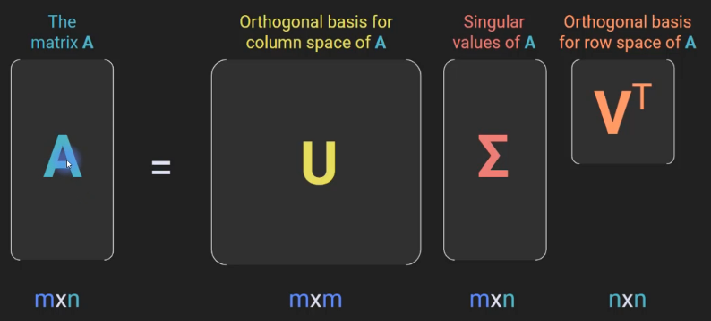

Singular Value Decomposition (SVD) is a factorization of a real or complex matrix into the product of three matrices: a unitary matrix, a diagonal matrix, and another unitary matrix. It is a powerful tool that is widely used in various applications, such as image compression, data analysis, and natural language processing, among others.

The unitary matrices in the SVD decomposition are orthogonal, meaning that their columns (or rows) are mutually orthogonal. The diagonal matrix in the SVD decomposition contains the singular values of the original matrix, which are positive real numbers that represent the "importance" of each singular vector in the decomposition. The singular vectors are the columns (or rows) of the unitary matrices in the SVD decomposition.

The SVD decomposition of a matrix A can be written as A = U * S * V^T, where U and V are unitary matrices, S is a diagonal matrix with the singular values, and V^T is the transpose of V.

The SVD decomposition has several important properties, such as being unique and allowing the rank of a matrix to be computed easily. It also provides a low-rank approximation of a matrix, which is useful in various applications, such as data compression, matrix completion, and denoising, among others.

In summary, SVD is a powerful tool that allows you to factorize a matrix into simpler components, providing insights into the structure and properties of the original matrix.

In [62]:
einstein = plt.imread("einstein.jpg")
#einstein

(405, 314, 3)


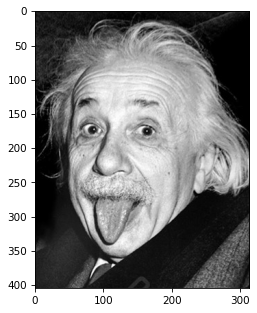

In [63]:
print(einstein.shape)
plt.imshow(einstein);

(405, 314)


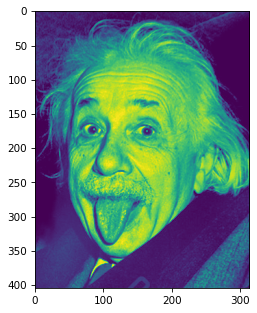

In [64]:
ein = np.mean(einstein,2)
print(ein.shape)
plt.imshow(ein);

(405, 405)
(405, 314)
(314, 314)


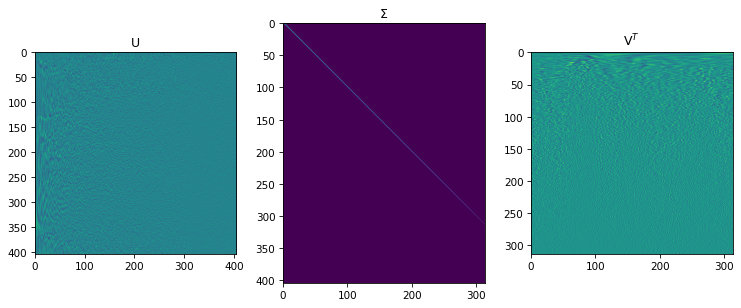

In [65]:
# Take the SVD
U,s,V = np.linalg.svd(ein)

S = np.zeros(np.shape(ein))
for i in range(0,len(s)):
    S[i,i] = np.log(s[i]) #log is just for visualization purposes


print(U.shape)
print(S.shape)
print(V.shape)

# image the results
fig,ax = plt.subplots(1,3, figsize=(10,6))

ax[0].imshow(U)
ax[0].set_title('U')

ax[1].imshow(S)
#ax[1].imshow(np.diag(np.log(s)))
ax[1].set_title('$\\Sigma$')

ax[2].imshow(V)
ax[2].set_title('V$^T$')

plt.tight_layout()

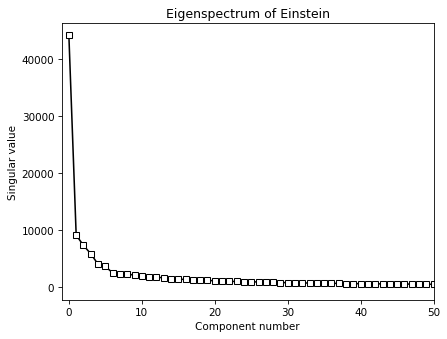

In [66]:
# plot the eigenspectrum

plt.plot(s, "ks-", markerfacecolor="w")
plt.xlim([-1, 50])
plt.xlabel("Component number")
plt.ylabel("Singular value")
plt.title("Eigenspectrum of Einstein")
plt.show()

**Exercise**

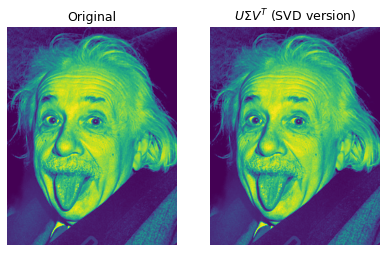

In [67]:
# reconstruct ein, then shuffle the singular values

# reconstruct S from s
S = np.zeros(np.shape(ein))  # S needs to be in the shape of the original img.
for i in range(0, len(s)):
    S[i, i] = s[i]  # S needs to be in the shape of the original img.

rein = U @ S @ V

plt.subplot(1, 2, 1)
plt.imshow(ein)
plt.axis("off")
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(rein)
plt.axis("off")
plt.title("$U\\Sigma V^T$ (SVD version)")

plt.show()

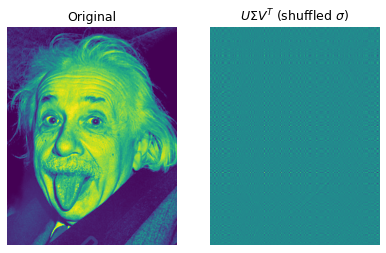

In [68]:
# reconstruct S from s
S = np.zeros(np.shape(ein))

randorder = np.random.permutation(len(s))

for i in range(0, len(s)):
    S[i, i] = s[
        randorder[i]
    ]  # this make an inrecognizable image, S order is important.

# for i in range(5,len(s)): # 0-10 and 5-end
#     S[i,i] = s[i]


rein = U @ S @ V

plt.subplot(1, 2, 1)
plt.imshow(ein)
plt.axis("off")
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(rein)
plt.axis("off")
plt.title("$U\\Sigma V^T$ (shuffled $\\sigma$)")

plt.show()

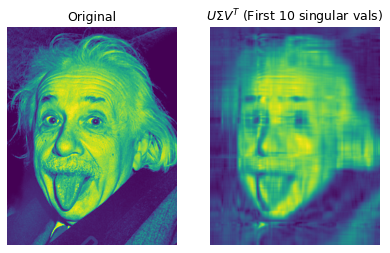

In [69]:
S = np.zeros(np.shape(ein))  # S needs to be in the shape of the original img.
for i in range(0, 10):  # only using the first 20 singular values.
    S[i, i] = s[i]

rein = U @ S @ V

plt.subplot(1, 2, 1)
plt.imshow(ein)
plt.axis("off")
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(rein)
plt.axis("off")
plt.title("$U\\Sigma V^T$ (First 10 singular vals)")

plt.show()

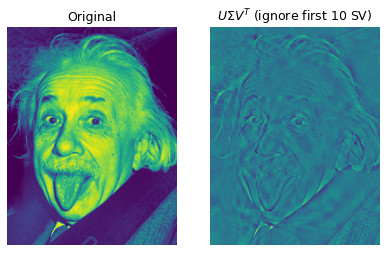

In [70]:
S = np.zeros(np.shape(ein))  # S needs to be in the shape of the original img.
for i in range(10, len(s)):  # only using the first 20 singular values.
    S[i, i] = s[i]

rein = U @ S @ V

plt.subplot(1, 2, 1)
plt.imshow(ein)
plt.axis("off")
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(rein)
plt.axis("off")
plt.title("$U\\Sigma V^T$ (ignore first 10 SV)")

plt.show()